# Extensión de funciones a intervalos

#[1]
####Amplía tu módulo de intervalos para que incluya la extensión de las funciones estándres monótonas a intervalos. En el caso de las potencias, extiénde lo que ya hayas hecho para que incluya potencias reales. Incluye algunas pruebas en `pruebas.jl` que muestren que lo que has hecho funciona bien.

In [1]:
using Intervalos, PyPlot, Graficador

INFO: Loading help data...


In [2]:
methods(Intervalo)

# 3 methods for generic function "Intervalo":
Intervalo(a::BigFloat,b::BigFloat) at /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/Intervalos/src/Intervalos.jl:15
Intervalo(a,b) at /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/Intervalos/src/Intervalos.jl:30
Intervalo(a) at /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/Intervalos/src/Intervalos.jl:32

In [3]:
inter1=Intervalo("2","2.5")
inter2=Intervalo("0","0.5")

[0e+00,
5e-01]

####Lo siguiente era parte del código pero ahora es texto porque está incluido en el módulo Intervalos

function redonUP(f::Function,x,y)
    with_rounding(BigFloat,RoundUp) do 
        f(BigFloat(x),BigFloat(y)) 
    end
end

function redonDOWN(f::Function,x,y)
    with_rounding(BigFloat,RoundDown) do 
        f(BigFloat(x),BigFloat(y))
    end
end

function redonUP(f::Function,x)
    with_rounding(BigFloat,RoundUp) do 
        f(BigFloat(x))
    end
end

function redonDOWN(f::Function,x)
    with_rounding(BigFloat,RoundDown) do 
        f(BigFloat(x))
    end
end


import Base.exp
import Base.log
import Base.atan
import Base.asin
import Base.acos

exp(x::Intervalo)=Intervalo(redonDOWN(exp,x.a),redonUP(exp,x.b))


log(x::Intervalo)= x.a<0 ? error("Función log no acepta números negativos \n") : Intervalo(redonDOWN(log,x.a),redonUP(log,x.b))


atan(x::Intervalo)=Intervalo(redonDOWN(atan,x.a),redonUP(atan,x.b))

asin(x::Intervalo)=
        x.a<-1||x.b>1 ? error("Función asin solo acepta números entre -1 y 1 \n") : Intervalo(redonDOWN(asin,x.a),redonUP(asin,x.b))

acos(x::Intervalo)=
        x.a<-1||x.b>1 ? error("Función acos solo acepta números entre -1 y 1 \n") : Intervalo(redonDOWN(acos,x.b),redonUP(acos,x.a))

^(x::Intervalo,y)=exp(y*log(x))

In [4]:
#println(asin(inter1)) #este genera un error, como debería
#println(acos(inter1)) #este genera un error, como debería

Lo siguiente está incluido en el test.jl del módulo Intervalo

Correlo estando en la carpeta de la Clase con:

`julia> include("MisModulos/Intervalos/test/pruebas.jl")`

In [5]:
using FactCheck

In [6]:
facts("Probando funciones sobre intervalos")do
    interv1=Intervalo("0.0","0.5")
    @fact exp(BigFloat(1.0)) => exp(Intervalo("1.0")).b
    @fact exp(Intervalo(1)).a => less_than(exp(Intervalo(1)).b) #checo redondeo
    @fact exp(interv1).a => 1.0
    @fact exp(interv1).b => greater_than_or_equal(exp(interv1.b))
    
    @fact log(interv1).a => -inf(BigFloat)
    @fact log(interv1).b => greater_than_or_equal(log(interv1.b))
    @fact log(interv1).b => less_than(1.0)
    
    @fact atan(interv1).a => 0.0
    @fact atan(interv1).b => greater_than_or_equal(atan(interv1.b))
    @fact atan(Intervalo(inf(BigFloat))).a => π/BigFloat(2)
    @fact atan(Intervalo(-inf(BigFloat))).b => π/BigFloat(-2)
    
    @fact asin(interv1).a => 0.0
    @fact asin(interv1).b => greater_than_or_equal(asin(interv1.b))
    @fact asin(Intervalo(1)).a => π/BigFloat(2)
    @fact asin(Intervalo(-1)).b => π/BigFloat(-2)
    
    @fact acos(interv1).a => less_than_or_equal(acos(interv1.b))
    @fact acos(interv1).b => nextfloat(π/BigFloat(2))
    @fact acos(Intervalo(1)) => Intervalo(0,0)
    @fact acos(Intervalo(-1)).a => π
    
    @fact (interv1^"0.5").a => 0.0 
    @fact (interv1^3.1).b => greater_than_or_equal((interv1.b)^3.1) #si este manda error, falta incluir redondeo
end;

Probando funciones sobre intervalos
21 facts verified.


In [7]:
include("../../MisModulos/Intervalos/test/pruebas.jl");

Probando tipo Intervalo
8 facts verified.
Probando operaciones entre intervalos
13 facts verified.
Probando funciones sobre intervalos
21 facts verified.


#[2]
#### ¿Cómo definirías la extensión a intervalos para funciones no monótonas? Repite [1] para este caso.

#### .......Lo estoy dejando para el final

#[3]
#### La extensión natural del intervalo para $f(x)=x/(1+x^2)$ es $F(\mathbf{x})=\mathbf{x}/(1+\mathbf{x}^2)$. ¿Cuál es la extensión natural del intervalo para $\mathbf{x}=[1,2]$? ¿Cómo se compara con el rango $R(f;[1,2])$. Ilustra los resultados con una gráfica.

In [8]:
disper(x)=x/(1+x^2)

disper (generic function with 1 method)

La extención natural es:

In [9]:
disper(Intervalo(1,2))

[1.999999999999999999999999999999999999999999999999999999999999999999999999999983e-01,
1e+00]

Sin embargo el rango es $R(f;[1,2])=[0.5,0.4]$

In [10]:
(disper(1),disper(2))

(0.5,0.4)

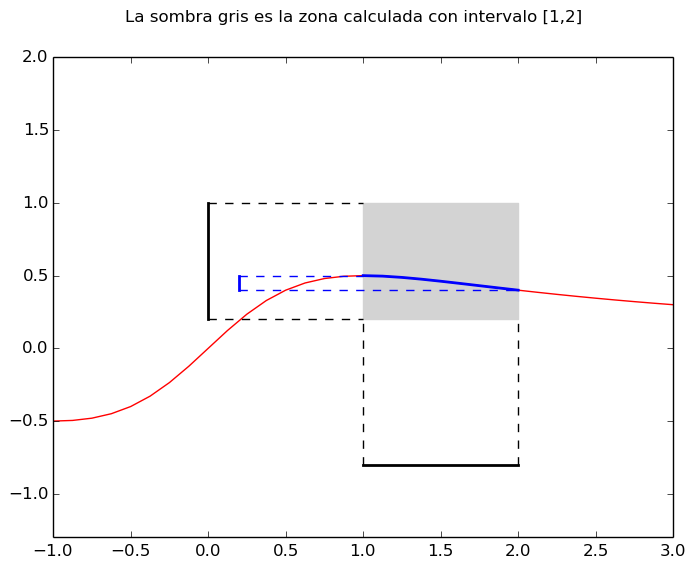

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f43b0298d50>

In [11]:
graficador(1,2,disper); #la función graficador está en el módulo Graficador en la carpeta MisModulos
#las siguientes líneas son solo para hacer más claro que el rango está contenido en la extensión natural
PyPlot.plot(0.2*[1,1],[disper(1),disper(2)], "blue", linewidth=2.0)
PyPlot.plot([0.2,1],disper(1)*[1,1],"blue", linewidth=1.0, linestyle="--")
PyPlot.plot([0.2,2],disper(2)*[1,1],"blue", linewidth=1.0, linestyle="--")

#[4]
#### Demuestra que $f(x)=(sin(x)−x^2+1)cos(x)$ no tiene raíces en $x=[0,1/2]$. Ilustra que el argumento es correcto gráficamente.

In [12]:
func1(x)=(sin(x)-x^2+1)*cos(x)

func1 (generic function with 1 method)

In [13]:
#Tras definir sin y cos solo hay que hacer:
#in(0.0,func1(Intervalo(0,0.5)))

In [14]:
#graficador(0,0.5,func1); 

# Rutina para encontrar raíces de una función

#[5]
#### Escribe un código quer utiliza la propiedad de los ceros para encontrar los intervalos donde podría haber un cero.

Probemos por ejemplo con la función disper y el intervalo [-1,3]

In [23]:
cerosin(f::Function,x::Intervalo)= in(0.0,f(x))

function parteIntervalo(x::Intervalo)
    a1=redonUP(/ , redonUP(+,x.a,x.b) , 2) #uso el redondeo para no dejar fuera números
    b1=redonDOWN(/ , redonDOWN(+,x.a,x.b) , 2)
    #[Intervalo(x.a,a1),Intervalo(b1,x.b)]
    [Intervalo(x.a,a1),Intervalo(b1,x.b),Intervalo(b1,a1)]
end

function ceros(f::Function,x::Intervalo)
    if cerosin(f,x)==false
        #no hago nada si no hay ceros
    else
        println("entró $x")
        if x.b-x.a < 0.5
            println("no")
            println("hay un cero en $x")
        else
            println("si")
            parInt=parteIntervalo(x)
            if parInt[1]==parInt[2]
                println("iguales")
                println("hay un cero en $x")
            elseif in(0.0,parInt[3])==true
                println("centro")
                println("$(Intervalo(x.a,prevfloat(parInt[3].a)))")
                println(in(0.0,Intervalo(x.a,prevfloat(parInt[3].a))))
                println(in(0.0,f(Intervalo(x.a,prevfloat(parInt[3].a)))))
                println(cerosin(f,parInt[1]))
                #println("$(Intervalo(nextfloat(parInt[3].b),x.b))")
                #println(in(0.0,Intervalo(nextfloat(parInt[3].b),x.b)))
                println("hay un cero en $(parInt[3])")
                ceros(f,Intervalo(x.a,prevfloat(parInt[3].a)))
                ceros(f,Intervalo(nextfloat(parInt[3].b),x.b))
            else
                println("sigue")
                ceros(f,parInt[1])
                
                ceros(f,parInt[2])
            end
        end
    end
end

ceros (generic function with 1 method)

In [24]:
inter3=Intervalo("-1.0","3.0")
inter4=Intervalo("5.1","6.01");

In [25]:
ceros(disper,inter4) #si la función no imprime nada entonces no hay ceros en inter4

In [26]:
ceros(disper,inter3)

entró [-1e+00,
3e+00]
si
sigue
entró [-1e+00,
1e+00]
si
centro
[-1e+00,
-2.382564904887951073216169781732674520415196125559239787955023752600945386104324e-323228497]
false
true
true
hay un cero en [0e+00,
-0e+00]
entró [-1e+00,
-2.382564904887951073216169781732674520415196125559239787955023752600945386104324e-323228497]
si
sigue
entró [-5.000000000000000000000000000000000000000000000000000000000000000000000000000086e-01,
-2.382564904887951073216169781732674520415196125559239787955023752600945386104324e-323228497]
si
sigue
entró [-2.500000000000000000000000000000000000000000000000000000000000000000000000000086e-01,
-2.382564904887951073216169781732674520415196125559239787955023752600945386104324e-323228497]
no
hay un cero en [-2.500000000000000000000000000000000000000000000000000000000000000000000000000086e-01,
-2.382564904887951073216169781732674520415196125559239787955023752600945386104324e-323228497]
entró [2.382564904887951073216169781732674520415196125559239787955023752600945386104

In [19]:
in(0.0,Intervalo(-5e-01,0))

true

In [20]:
inter9=Intervalo("0.1","0.1")
parteIntervalo(inter9)

3-element Array{Intervalo,1}:
 [9.999999999999999999999999999999999999999999999999999999999999999999999999999914e-02,
1.000000000000000000000000000000000000000000000000000000000000000000000000000002e-01]
 [9.999999999999999999999999999999999999999999999999999999999999999999999999999914e-02,
1.000000000000000000000000000000000000000000000000000000000000000000000000000002e-01]
 [9.999999999999999999999999999999999999999999999999999999999999999999999999999914e-02,
1.000000000000000000000000000000000000000000000000000000000000000000000000000002e-01]

In [21]:
parteIntervalo(inter9)[1]==parteIntervalo(inter9)[2]

true

In [22]:
parteIntervalo(inter9)[3]

[9.999999999999999999999999999999999999999999999999999999999999999999999999999914e-02,
1.000000000000000000000000000000000000000000000000000000000000000000000000000002e-01]

In [44]:
cerosin(f::Function,x::Intervalo)= in(0.0,f(x))

function parteIntervalo(x::Intervalo)
    a1=redonUP(/ , redonUP(+,x.a,x.b) , 2) #uso el redondeo para no dejar fuera números
    b1=redonDOWN(/ , redonDOWN(+,x.a,x.b) , 2)
    #[Intervalo(x.a,a1),Intervalo(b1,x.b)]
    [Intervalo(x.a,a1),Intervalo(b1,x.b)]
end

function parteIntervalo3(x::Intervalo)
    medio=parteIntervalo(x)
    cuarto1=parteIntervalo(medio[1])[1]
    cuarto3=parteIntervalo(medio[2])[2]
    cuartoMedio= Intervalo( parteIntervalo(medio[1])[2].a  ,  parteIntervalo(medio[2])[1].b )
    [cuarto1, cuartoMedio, cuarto3]
end

function ceros(f::Function,x::Intervalo)
    presicion=0.5
    if cerosin(f,x)==false
        #no hago nada si no hay ceros
    else
        #println("entró $x")#descomenta para debugear :P
        if x.b-x.a < presicion
            #println("no") #descomenta para debugear :P
            println("hay un cero en $x")
        else
            #println("si") #descomenta para debugear :P
            parInt=parteIntervalo(x)
            if parInt[1]==parInt[2] #este es un límite por si pongo una presición demasiado pequeña o algo así.
                #println("iguales") #descomenta para debugear :P
                println("hay un cero en $x")
                
                
                # lo que hago ahora es preguntar si al dividir entre dos ambos intervalos contienen al cero:
                # cerosin(f,1) = cerosin(f,2) = true. Si esto ocurre entonces
                # divido intervalo entre "3" partes no iguales _ __ _ , si no entonces divide entre 2
                
            elseif cerosin(f,parInt[1])==true && cerosin(f,parInt[2])==true
                #println("centro") #descomenta para debugear :P
                parInt3=parteIntervalo3(x)
                ceros(f,parInt3[1])
                ceros(f,parInt3[2])
                ceros(f,parInt3[3])
            else
                #println("sigue") #descomenta para debugear :P
                ceros(f,parInt[1])
                ceros(f,parInt[2])
            end
        end
    end
end

ceros (generic function with 1 method)

In [45]:
inter3=Intervalo("-1.0","3.0")
inter4=Intervalo("5.1","6.01");

In [46]:
ceros(disper,inter4) #si la función no imprime nada entonces no hay ceros en inter4

In [47]:
ceros(disper,inter3)

hay un cero en [-1.25e-01,
1.25e-01]
